In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

%matplotlib inline

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,level_0,index,id_student,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,tma_cma_assmt_score,total_weight,is_reenrolled,final_exam_score
0,0,0,3733,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,1,6516,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,790.0,389.0,715.0,641.0,2791.0,63.5,100.0,0.0,0.0
2,2,2,8462,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,442.0,123.0,0.0,0.0,646.0,34.9,40.0,0.0,0.0
3,3,3,8462,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,10.0,0.0,0.0,0.0,10.0,43.0,50.0,1.0,0.0
4,4,4,11391,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,431.0,99.0,85.0,221.0,934.0,82.4,100.0,0.0,0.0


In [4]:
observed = ['year','term','module_domain','region','gender','disability','allclicks','age_band'
               ,'num_of_prev_attempts','final_result','highest_education'
               ,'is_reenrolled','imd_band','studied_credits']
observed_ft = ['year','term','module_domain','gender','disability','allclicks','age_band'
               ,'num_of_prev_attempts','final_result','highest_education'
               ,'studied_credits']
observed_reg = ['gender','disability','allclicks','age_band'
               ,'num_of_prev_attempts','highest_education'
               ,'studied_credits']
drop_cols = ['term','year','module_domain']  

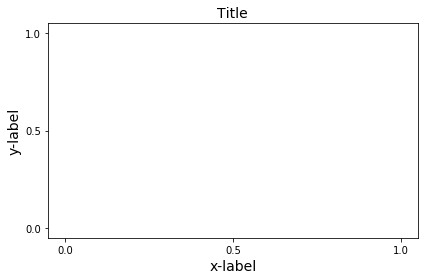

In [5]:


def example_plot(ax, fontsize=14):
#     ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)
    
fig, ax = plt.subplots()
example_plot(ax)
plt.tight_layout()

In [6]:
df.dtypes

level_0                         int64
index                           int64
id_student                      int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region                          int64
highest_education               int64
imd_band                      float64
studied_credits                 int64
b4_sum_clicks                 float64
q1_sum_clicks                 float64
q2_sum_clicks                 float64
q3_sum_clicks                 float64
q4_sum_clicks                 float64
allclicks                     float64
tma_cma_assmt_score           float64
total_weight                  float64
is_reenrolled                 float64
final_exam_s

In [7]:
df['module_domain'].value_counts()

1    21402
0    11191
Name: module_domain, dtype: int64

In [8]:
df['allclicks'].isnull().sum()

6800

In [9]:
df.groupby(['year', 'term','module_domain']).count()

level_0  index  id_student  \
year term module_domain                               
0    0    0                 3572   3572        3572   
          1                 5273   5273        5273   
     1    0                 1767   1767        1767   
          1                 2917   2917        2917   
1    0    0                 3406   3406        3406   
          1                 7854   7854        7854   
     1    0                 2446   2446        2446   
          1                 5358   5358        5358   

                         module_presentation_length  num_of_prev_attempts  \
year term module_domain                                                     
0    0    0                                    3572                  3572   
          1                                    5273                  5273   
     1    0                                    1767                  1767   
          1                                    2917                  2917   
1    0    0                                    3406                  3406   
          1                                    7854                  7854   
     1    0                                    2446                  2446   
          1                                    5358                  5358   

                         final_result  date_registration  disability  gender  \
year term module_domain                                                        
0    0    0                      3572               3570        3572    3572   
          1                      5273               5265        5273    5273   
     1    0                      1767               1766        1767    1767   
          1                      2917               2910        2917    2917   
1    0    0                      3406               3405        3406    3406   
          1                      7854               7846        7854    7854   
     1    0                      2446               2441        2446    2446   
          1                      5358               5345        5358    5358   

                         age_band  region  highest_education  imd_band  \
year term module_domain                                                  
0    0    0                  3572    3572               3572      3538   
          1                  5273    5273               5273      5040   
     1    0                  1767    1767               1767      1746   
          1                  2917    2917               2917      2761   
1    0    0                  3406    3406               3406      3384   
          1                  7854    7854               7854      7481   
     1    0                  2446    2446               2446      2430   
          1                  5358    5358               5358      5102   

                         studied_credits  b4_sum_clicks  q1_sum_clicks  \
year term module_domain                                                  
0    0    0                         3572           2878           2878   
          1                         5273           4203           4203   
     1    0                         1767           1368           1368   
          1                         2917           2433           2433   
1    0    0                         3406           2733           2733   
          1                         7854           6189           6189   
     1    0                         2446           1889           1889   
          1                         5358           4100           4100   

                         q2_sum_clicks  q3_sum_clicks  q4_sum_clicks  \
year term module_domain                                                
0    0    0                       2878           2878           2878   
          1                       4203           4203           4203   
     1    0                       1368           1368           1368   
          1                       2433           2433       

In [10]:
tempDf = df[observed_ft].copy()

In [11]:
tempDf.head(20)

,year,term,module_domain,gender,disability,allclicks,age_band,num_of_prev_attempts,final_result,highest_education,studied_credits
0,0,0,1,0,0,NaN,2,0,0,3,60
1,1,0,0,0,0,2791.0,2,0,1,3,60
2,0,0,1,0,0,646.0,2,0,0,3,90
3,1,0,1,0,0,10.0,2,1,0,3,60
4,0,0,0,0,0,934.0,2,0,1,3,240
5,0,1,0,1,0,161.0,0,2,0,1,60
6,0,0,0,1,0,NaN,0,0,0,2,60
7,1,0,1,1,0,910.0,0,0,1,2,120
8,0,0,0,0,0,590.0,0,0,1,2,60
9,1,1,0,1,1,184.0,0,0,1,1,30


In [12]:
tempDf = tempDf.loc[(tempDf.year == 1) & (tempDf.term == 0) & (tempDf.module_domain == 1)]

tempDf['final_result'].fillna(0)
tempDf['allclicks'].fillna(0)


3          10.0
7         910.0
16        997.0
17        113.0
30       1847.0
          ...  
32561    1382.0
32578    1767.0
32579       0.0
32588       0.0
32592       0.0
Name: allclicks, Length: 7854, dtype: float64

In [13]:
tempDf = tempDf.drop(drop_cols, axis=1)

In [14]:
tempDf.head()

,gender,disability,allclicks,age_band,num_of_prev_attempts,final_result,highest_education,studied_credits
3,0,0,10.0,2,1,0,3,60
7,1,0,910.0,0,0,1,2,120
16,1,0,997.0,0,0,0,3,60
17,1,0,113.0,0,2,0,3,150
30,0,0,1847.0,0,0,1,3,120


In [15]:
import matplotlib
matplotlib.__version__

'3.1.0'

#label
bins = [0, 12, 17, 60, np.inf]
  labels = ['child', 'teenager', 'adult', 'elder']
  age_groups = pd.cut(titanic.age, bins, labels=labels)
  titanic['age_group'] = age_groups

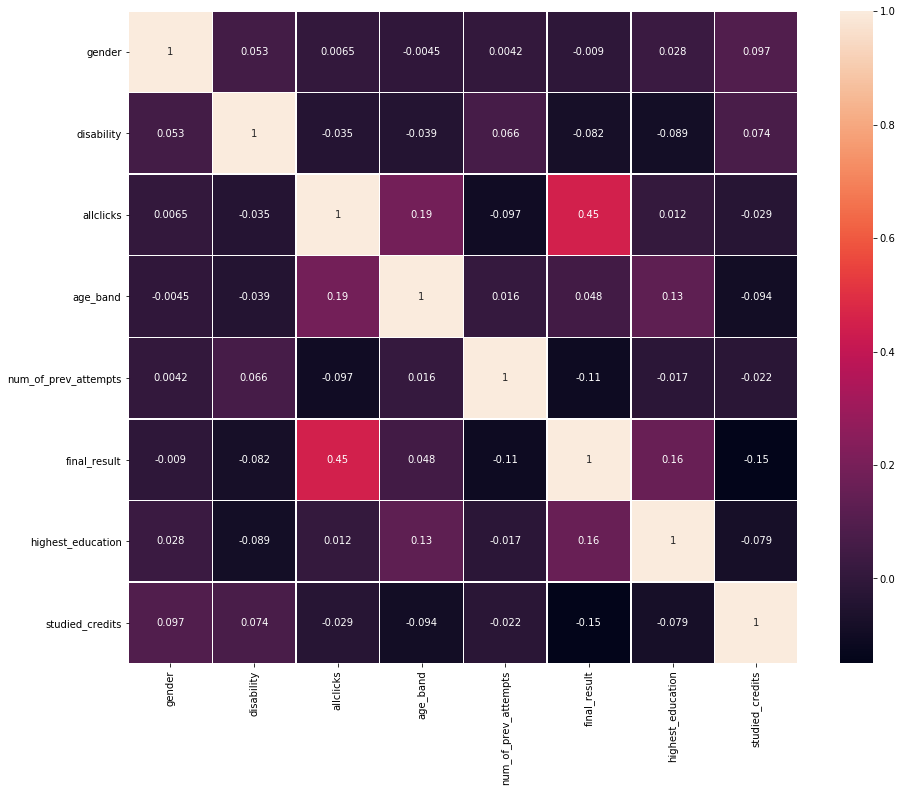

In [16]:

import seaborn as sns;
import matplotlib.pyplot as plt


plt.figure(figsize=(15,12))
sns.heatmap(tempDf.corr(),annot=True,linewidth=0.5);

# tempDf = tempDf.pivot("year", "term", "module_domain")
# sns.heatmap(tempDf.corr(), annot=True, fmt=".2f", linewidths=.05)
plt.show()

In [17]:
predict = 'final_result'

predDf = df.loc[(df.year == 1) & (df.term == 0) & (df.module_domain == 1)]
predDf = predDf.dropna()
# Extract our X and y data

X = predDf[observed_reg]
y = predDf[predict]

# Sample data 
x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.25, random_state=0)

In [18]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(X)

# # Classified data
# # le.classes(X) or list(le.classes_)
# # encode data to numberic type
# le.transform(X) 
# # De-encode
# le.inverse_transform(X)


In [19]:

from sklearn import linear_model

# LOGISTIC REGRESSION
linear = linear_model.LogisticRegression()
linear.fit(x_train,y_train)

# Make predictions based on the test data
predictions = linear.predict(x_test)

print(predictions)

# Frame Prediction data 
# test_predictions = pd.DataFrame({
#         "final_result": tempDf["final_result"],
#         "predicted_result": predictions
#     })
# test_predictions.head(10)

[0 1 1 ... 1 0 0]


/home/jinna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


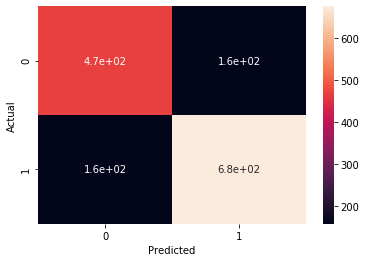

In [21]:
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test,predictions, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

In [ ]:

# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, predictions))